# Integer Conversions

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SignedIntegerToTwosComplement`
Convert a register storing the signed integer representation to two's complement inplace.

#### Parameters
 - `bitsize`: size of the register. 

#### Registers
 - `x`: input signed integer (ones' complement) register.
 - `y`: output signed integer register in two's complement. 

#### References
 - [Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). page 24, 4th paragraph from the bottom.


In [2]:
from qualtran.bloqs.arithmetic.conversions import SignedIntegerToTwosComplement

### Example Instances

In [3]:
signed_to_twos = SignedIntegerToTwosComplement(bitsize=10)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([signed_to_twos],
           ['`signed_to_twos`'])

### Call Graph

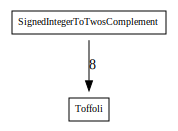

#### Counts totals:
 - `Toffoli`: 8

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
signed_to_twos_g, signed_to_twos_sigma = signed_to_twos.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(signed_to_twos_g)
show_counts_sigma(signed_to_twos_sigma)

In [6]:
from qualtran.bloqs.arithmetic import ToContiguousIndex

### Example Instances

In [7]:
to_contg_index = ToContiguousIndex(bitsize=4, s_bitsize=8)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([to_contg_index],
           ['`to_contg_index`'])

### Call Graph

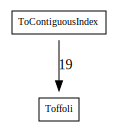

#### Counts totals:
 - `Toffoli`: 19

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
to_contg_index_g, to_contg_index_sigma = to_contg_index.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(to_contg_index_g)
show_counts_sigma(to_contg_index_sigma)

## `SignExtend`
Sign-Extend a value to a value of larger bitsize.

Useful to implement arithmetic operations with differing operand bitsizes.
A sign extension copies the MSB into the new bits of the wider value. For
example: a 4-bit to 6-bit sign-extension of `1010` gives `111010`.

See :class:`SignTruncate` for the adjoint operation.

#### Parameters
 - `inp_dtype`: input data type.
 - `out_dtype`: output data type. must be same class as `inp_dtype`, and have larger bitsize. 

#### Registers
 - `x`: the input register of type `inp_dtype`
 - `y`: the output register of type `out_dtype`


In [10]:
from qualtran.bloqs.arithmetic.conversions import SignExtend

### Example Instances

In [11]:
from qualtran import QInt

sign_extend = SignExtend(QInt(8), QInt(16))

In [12]:
from qualtran import QFxp

sign_extend_fxp = SignExtend(QFxp(8, 4, signed=True), QFxp(16, 4, signed=True))

#### Graphical Signature

In [13]:
from qualtran.drawing import show_bloqs
show_bloqs([sign_extend],
           ['`sign_extend`'])

### Call Graph

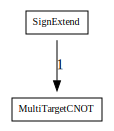

#### Counts totals:
 - `MultiTargetCNOT`: 1

In [14]:
from qualtran.resource_counting.generalizers import ignore_split_join
sign_extend_g, sign_extend_sigma = sign_extend.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sign_extend_g)
show_counts_sigma(sign_extend_sigma)

## `SignTruncate`
Truncate a signed value to a smaller bitsize.

Useful to implement arithmetic operations with differing operand bitsizes.
A signed truncation xors the MSB (sign bit) into the bits to drop, and
deallocates them.

See :class:`SignExtend` for the adjoint operation.


#### Parameters
 - `inp_dtype`: input data type.
 - `out_dtype`: output data type. must be same class as `inp_dtype`, and have smaller bitsize. 

#### Registers
 - `x`: the input register of type `inp_dtype`
 - `y`: the output register of type `out_dtype`


In [15]:
from qualtran.bloqs.arithmetic.conversions import SignTruncate

### Example Instances

In [16]:
from qualtran import QInt

sign_truncate = SignTruncate(QInt(16), QInt(8))

#### Graphical Signature

In [17]:
from qualtran.drawing import show_bloqs
show_bloqs([sign_truncate],
           ['`sign_truncate`'])

### Call Graph

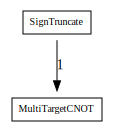

#### Counts totals:
 - `MultiTargetCNOT`: 1

In [18]:
from qualtran.resource_counting.generalizers import ignore_split_join
sign_truncate_g, sign_truncate_sigma = sign_truncate.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sign_truncate_g)
show_counts_sigma(sign_truncate_sigma)